f(x) = (sin(x)/2 + cos(x)/2)^2 * sin(x)

1. Определить корни
2. Найти интервалы, на которых функция возрастает
3. Найти интервалы, на которых функция убывает
4. Построить график
5. Вычислить вершину
6. Определить промежутки, на котором f > 0
7. Определить промежутки, на котором f < 0

In [1]:
import sympy
from sympy.plotting import plot
from sympy import solve, solveset, diff, pi, Interval, maximum, minimum

__Функция__

In [2]:
x = sympy.Symbol("x")

In [3]:
y = (sympy.sin(x)/2 + sympy.cos(x)/2)**2 * sympy.sin(x)
print(y)

(sin(x)/2 + cos(x)/2)**2*sin(x)


__График функции__

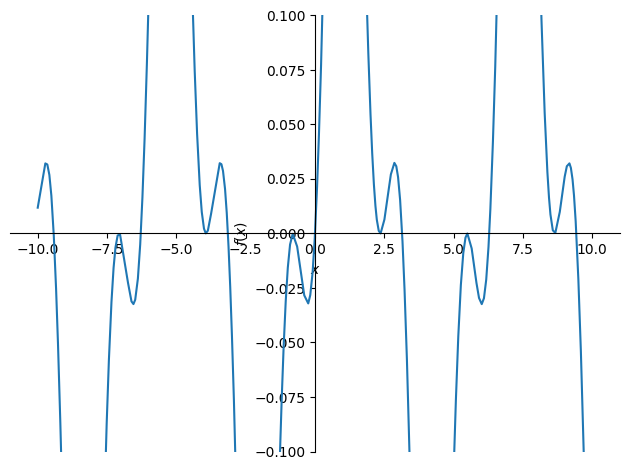

In [4]:
plot(y, ylim=(-0.1, 0.1))

__Корни функции__

In [5]:
roots = solve(y, x)
print(roots)

[0, -pi/4, 3*pi/4, pi]


In [6]:
solveset(y, x)

Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

__Вычисление производной функции__

In [7]:
diff_y = diff(y)
print(diff_y)

(-sin(x) + cos(x))*(sin(x)/2 + cos(x)/2)*sin(x) + (sin(x)/2 + cos(x)/2)**2*cos(x)


__График производной функции__

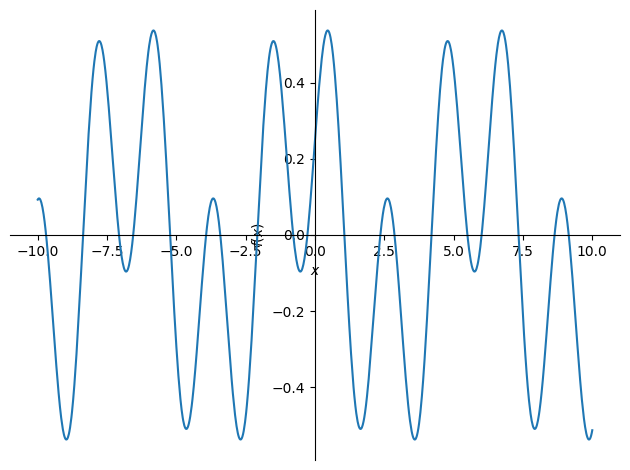

In [8]:
plot(diff_y)

__Вычисление экстремумов производной__

In [9]:
extr_f = solve(diff_y, x)
for i in extr_f:
    print(round(i.evalf(), 3), "\t", i)

-0.785 	 -pi/4
2.356 	 3*pi/4
-2.082 	 -2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2)
2.868 	 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2)
1.059 	 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2)
-0.274 	 2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2)


__Отрезки функции__

In [10]:
if extr_f[-1] != pi:
    extr_f.append(pi)
if extr_f[0] != -pi:
    extr_f.insert(0, -pi)
extr_f.sort()
for i in extr_f:
    print(round(i.evalf(), 3), "\t", i)

-3.142 	 -pi
-2.082 	 -2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2)
-0.785 	 -pi/4
-0.274 	 2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2)
1.059 	 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2)
2.356 	 3*pi/4
2.868 	 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2)
3.142 	 pi


__Интервалы, на которых функция возрастает и убывает__

In [11]:
for i in range(len(extr_f) - 1):
    result = diff_y.subs(x, (extr_f[i+1] + extr_f[i]) / 2)
    if result > 0:
        print(f"На отрезке ({round(extr_f[i].evalf(), 3)}: {round(extr_f[i+1].evalf(), 3)}) функция возрастает")
    else:
        print(f"На отрезке ({round(extr_f[i].evalf(), 3)}: {round(extr_f[i+1].evalf(), 3)}) функция убывает")

На отрезке (-3.142: -2.082) функция убывает
На отрезке (-2.082: -0.785) функция возрастает
На отрезке (-0.785: -0.274) функция убывает
На отрезке (-0.274: 1.059) функция возрастает
На отрезке (1.059: 2.356) функция убывает
На отрезке (2.356: 2.868) функция возрастает
На отрезке (2.868: 3.142) функция убывает


__Вершина функции__

In [12]:
y_max_value = maximum(y, x, Interval(-pi, pi).evalf())
y_min_value = minimum(y, x, Interval(-pi, pi).evalf())
print(round(y_max_value, 3))
print(round(y_min_value, 3))

0.404
-0.404


In [13]:
for i in range(len(extr_f)):
    coordinate = y.subs(x, extr_f[i])
    print(f"Вершина №{i+1}: x = {round(extr_f[i].evalf(), 3)}, y = {round(coordinate, 3)}")
    if i == 0:
          y_max = coordinate
          y_min = coordinate
    else:
          if y_min > coordinate:
              y_min = coordinate
          if y_max < coordinate:
              y_max = coordinate
print(f"Максимальное значение координаты y = {y_max.evalf()}")
print(f"Минимальное значение координаты y = {y_min.evalf()}")

Вершина №1: x = -3.142, y = 0
Вершина №2: x = -2.082, y = -0.404
Вершина №3: x = -0.785, y = 0
Вершина №4: x = -0.274, y = -0.032
Вершина №5: x = 1.059, y = 0.404
Вершина №6: x = 2.356, y = 0
Вершина №7: x = 2.868, y = 0.032
Вершина №8: x = 3.142, y = 0
Максимальное значение координаты y = 0.404106232073136
Минимальное значение координаты y = -0.404106232073136


__Отрезки, на которых f > 0 и f < 0__

In [14]:
if roots[-1] != pi:
    roots.append(pi)
if roots[0] != -pi:
    roots.insert(0, -pi)
roots.sort()
print(roots)

[-pi, -pi/4, 0, 3*pi/4, pi]


In [15]:
for i in range(len(roots) - 1):
    result = y.subs(x, ((roots[i+1] + roots[i])/ 2))
    if result > 0:
        print(f"f > 0 на отрезке ({roots[i]}: {roots[i+1]})")
    else:
        print(f"f < 0 на отрезке ({roots[i]}: {roots[i+1]})")

f < 0 на отрезке (-pi: -pi/4)
f < 0 на отрезке (-pi/4: 0)
f > 0 на отрезке (0: 3*pi/4)
f > 0 на отрезке (3*pi/4: pi)
